# Clusterização

Técnicas de clusterização configuram Aprendizado Não-Supervisionado. Nestes tipos de problema, não possuimos os rótulos, ou seja, é de responsabilidade do nosso algoritmo encontrar relações e descobrir padrões nos nossos dados sem utilizar de uma informação prévia (no caso, os rótulos).
Desta forma, existem algumas técnicas que serão exploradas nessa sessão. Começaremos pelos problemas de agrupamento ou clusterização, abordando 2 técnicas, K-Means e Agrupamento Hierárquico.

## K-Means

In [1]:
# Importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# Importando o dataset
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:,[3,4]]

In [3]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


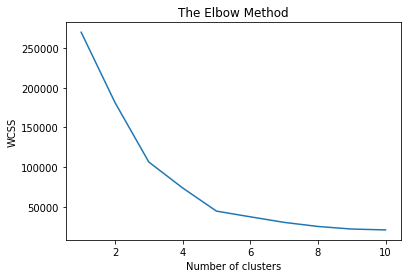

In [4]:
# Usando o método do cotovelo para encontrar o melhor k
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    # k-means++ evita armadilha de inicialização errada
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # calcula o wcss
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
# Aplicando Kmeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

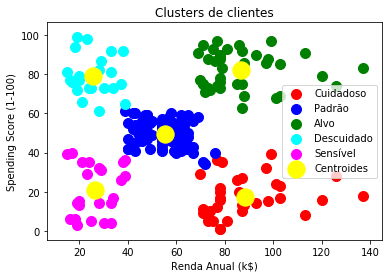

In [19]:
# Plotando os clusters

#X = X.values
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cuidadoso')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Padrão')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Alvo')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Descuidado')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Sensível')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroides')
plt.title('Clusters de clientes')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Podemos notar que o algoritmo automaticamente foi capaz de encontrar relações entre os dados e agrupá-los em clusters que nos fornecem informações sobre os perfis de clientes.

## Agrupamento Hierárquico

Neste tipo de agrupamento, constroem-se Dendogramas e a partir deles infere-se a quantidade de clusters.

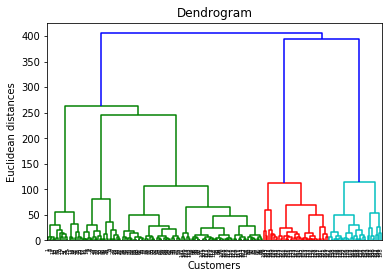

In [11]:
# Plotando os Dendogramas para encontrar o número de clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [15]:
# Treinando o modelo
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

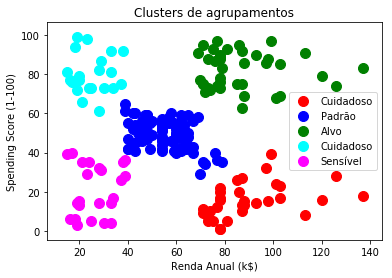

In [20]:
# Visualização do modelo
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cuidadoso')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Padrão')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Alvo')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cuidadoso')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensível')
plt.title('Clusters de agrupamentos')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Nota-se que os resultados são semelhantes, porém a abordagem e as técnicas utilizadas são diferentes. Portanto é necessário conhecer os dados e saber escolher adequadamente o tipo de algoritmo que será utilizado.